In [9]:
%reload_ext autoreload
%autoreload 2

import os
import sys

import numpy as np
import astropy.units as u
import astropy.constants as c
from astropy.cosmology import Planck18 as cosmo

sys.path.append(os.environ['DH_DIR'])
import darkhistory.physics as dhphys

sys.path.append(os.environ['DM21CM_DIR'])
from dm21cm.preprocessing.accretion import PBHAccretionModel

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('../../plotting/matplotlibrc')

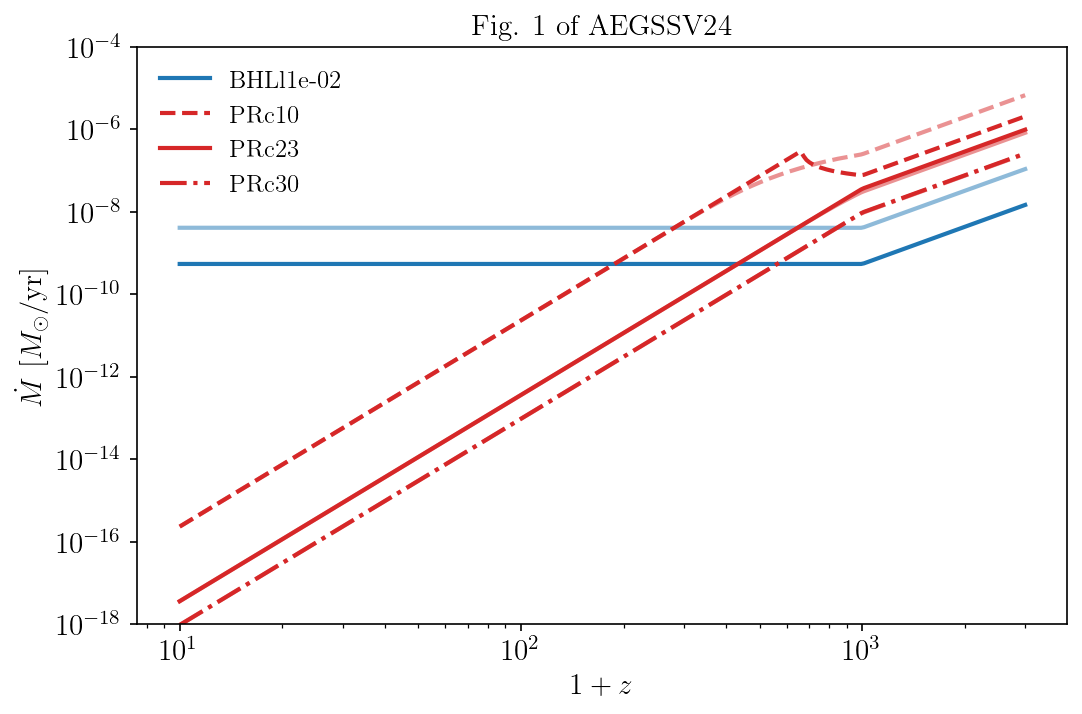

In [13]:
m_PBH = 1000

am_s = [
    PBHAccretionModel('BHL-ADAF', lambda_fudge=1e-2),
    PBHAccretionModel('PR-ADAF', c_in=10),
    PBHAccretionModel('PR-ADAF', c_in=23),
    PBHAccretionModel('PR-ADAF', c_in=30),
]

color_s = ['C2', 'C0', 'C0', 'C0']
ls_s = ['-', '--', '-', '-.']

z_s = np.geomspace(10-1, 3000-1, 300)

fig, ax = plt.subplots(figsize=(8, 5))

for i_am, am in enumerate(am_s):
    Mdot_s = []
    Mdot_vint_s = []
    for z in z_s:
        T_k = dhphys.Tm_std(1+z)
        rho_inf = (cosmo.critical_density(z) * cosmo.Ob(z)).to(u.g/u.cm**3).value
        Mdot_s.append(am.Mdot_cosmo_single_PBH_singlevcb(m_PBH, z, rho_inf, T_k))
        Mdot_vint_s.append(am.Mdot_cosmo_single_PBH(m_PBH, z, rho_inf, T_k))

    ax.plot(1+z_s, Mdot_s, label=am.name, color=color_s[i_am], ls=ls_s[i_am])
    ax.plot(1+z_s, Mdot_vint_s, color=color_s[i_am], ls=ls_s[i_am], alpha=0.5)
ax.set(xscale='log', yscale='log')
ax.set(ylim=(1e-18, 1e-4))
ax.set(xlabel=r'$1+z$', ylabel=r'$\dot{M}$ [$M_\odot$/yr]', title='Fig. 1 of AEGSSV24')
ax.legend(frameon=False)

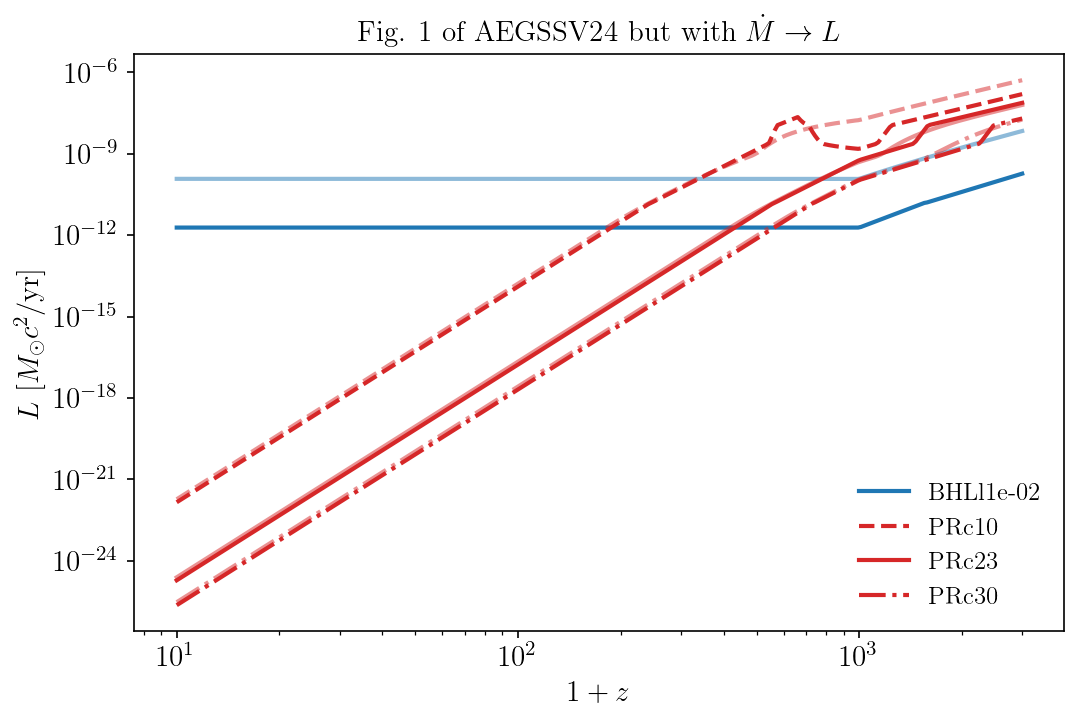

In [16]:
m_PBH = 1000

am_s = [
    PBHAccretionModel('BHL-ADAF', lambda_fudge=1e-2),
    PBHAccretionModel('PR-ADAF', c_in=10),
    PBHAccretionModel('PR-ADAF', c_in=23),
    PBHAccretionModel('PR-ADAF', c_in=30),
]

color_s = ['C2', 'C0', 'C0', 'C0']
ls_s = ['-', '--', '-', '-.']

z_s = np.geomspace(10-1, 3000-1, 300)

fig, ax = plt.subplots(figsize=(8, 5))

for i_am, am in enumerate(am_s):
    L_s = []
    L_vint_s = []
    for z in z_s:
        T_k = dhphys.Tm_std(1+z)
        rho_inf = (cosmo.critical_density(z) * cosmo.Ob(z)).to(u.g/u.cm**3).value
        L_s.append(am.L_cosmo_single_PBH_singlevcb(m_PBH, z, rho_inf, T_k))
        L_vint_s.append(am.L_cosmo_single_PBH(m_PBH, z, rho_inf, T_k))

    ax.plot(1+z_s, L_s, label=am.name, color=color_s[i_am], ls=ls_s[i_am])
    ax.plot(1+z_s, L_vint_s, color=color_s[i_am], ls=ls_s[i_am], alpha=0.5)
ax.set(xscale='log', yscale='log')
# ax.set(ylim=(1e-18, 1e-4))
ax.set(xlabel=r'$1+z$', ylabel=r'$L$ [$M_\odot c^2$/yr]',
       title=r'Fig. 1 of AEGSSV24 but with $\dot M \rightarrow L$')
ax.legend(frameon=False)